In [7]:
# import gym as gym
import numpy as np
import importlib
import matplotlib.pyplot as plt
import AC_class_TIM
import random
importlib.reload(AC_class_TIM)
from AC_class_TIM import AlmgrenChrissEnv

In [8]:
# Strategy for random liquidation (random actions)
def random_liquidation_strategy(state, N):
    """
    Random liquidation strategy: liquidates a random number of shares within valid bounds at each step.
    
    :param remaining_shares: The current number of remaining shares.
    :return: Number of shares to sell.
    """
    remaining_shares, time_step, price, actual_proceeds, I =state
    return random.choice([random.uniform(0, remaining_shares/4),0,0,0])

In [9]:

def frontload(state, N):
    remaining_shares, time_step, price, actual_proceeds, I =state
    return remaining_shares


In [10]:
class simulateAC(AlmgrenChrissEnv):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)  # Initialize parent class
        self.simulation_results = {
            "inventory": [],
            "prices": [],
            "actions": [],
            "rewards": [],
            "proceeds": [],
        }
    def clear(self):
        self.simulation_results = {
            "inventory": [],
            "prices": [],
            "actions": [],
            "rewards": [],
            "proceeds": [],
        }
    def sim_history(self, fn_strategy, render=False):
        self.state, info = self.reset()
        done = False
        total_ideal_proceeds = self.X0* self.initial_price
        while not done:
            # Log the simulation details
            self.simulation_results["inventory"].append(self.inventory)
            self.simulation_results["prices"].append(self.price)
            if render:
                self.render()
            #step through the environment
            action = np.array([fn_strategy(self.state,self.N)])
            self.simulation_results["actions"].append(action)
            self.state, reward, done, info = self.step(action)
            #Log simulation details
            
            self.simulation_results["rewards"].append(reward)
            self.simulation_results["proceeds"].append(self.total_actual_proceeds)
            
        return self.simulation_results
    
    def plot_hist(self, actions = True, inv = False, rewards = False, prices = True, proceeds = True):
        fig_size = (10,8)

        i = actions + inv + inv + rewards+ prices + proceeds
        # Create figure and axis objects
        fig, axs = plt.subplots(i, 1, figsize=fig_size, sharex=True)
        
        # Set a title for the entire figure
        #fig.suptitle(title, fontsize=16)
        count = 0
        # Plot the first time series - how much you liquidate per time step
        if actions == True:
            axs[count].plot(self.simulation_results["actions"], color='b', ls= '--', label='actions', linewidth=1)
            ylabel = 'action'
            axs[count].set_ylabel(ylabel, fontsize=12)
            axs[count].legend(loc='upper left')
            axs[count].grid(True)
            count += 1
        # Plot the second time series - how much inventory is left per time step
        if inv == True:
            axs[count].plot(self.simulation_results["inventory"], color='g', label='inventory', linewidth=1)
            ylabel = 'inventory'
            axs[count].set_ylabel(ylabel, fontsize=12)
            axs[count].legend(loc='upper left')
            axs[count].grid(True)
            count += 1
        # Plot the third time series - shortfall at each step
        if rewards == True:
            axs[count].plot(self.simulation_results["rewards"], color='r', label='reward', linewidth=1)
            ylabel = 'reward'
            axs[count].set_ylabel(ylabel, fontsize=12)
            axs[count].legend(loc='upper left')
            axs[count].grid(True)
            count += 1
    # Plot the 4th time series - price changes
        if prices == True:
            axs[count].plot(self.simulation_results["prices"], color='y', label='prices', linewidth=1)
            ylabel = 'price'
            axs[count].set_ylabel(ylabel, fontsize=12)
            axs[count].legend(loc='upper left')
            axs[count].grid(True)
            count +=1

    # Plot the 5th time series - actual proceeds
        if proceeds == True:
            axs[count].plot(self.simulation_results["proceeds"], color='c', label='culmulative proceeds', linewidth=1)
            ylabel = 'proceeds'
            axs[count].set_ylabel(ylabel, fontsize=12)
            axs[count].legend(loc='upper left')
            axs[count].grid(True)
            xlabel = 'time step'
            axs[count].set_xlabel(xlabel, fontsize=12)
        # Tight layout to ensure no overlap
        plt.tight_layout(rect=[0, 0, 1, 0.97])

        # Show the plot
        plt.show()


Step: 0, Remaining Shares: 1000000.0, Price: 50.00, Total_Proceeds:0, Market_Resilience:0
Step: 1, Remaining Shares: 0.0, Price: 47.25, Total_Proceeds:24937500.0, Market_Resilience:2.5
Step: 2, Remaining Shares: 0.0, Price: 47.88, Total_Proceeds:24937500.0, Market_Resilience:1.875
Step: 3, Remaining Shares: 0.0, Price: 48.34, Total_Proceeds:24937500.0, Market_Resilience:1.40625
Step: 4, Remaining Shares: 0.0, Price: 48.70, Total_Proceeds:24937500.0, Market_Resilience:1.0546875
Step: 5, Remaining Shares: 0.0, Price: 48.96, Total_Proceeds:24937500.0, Market_Resilience:0.791015625
Step: 6, Remaining Shares: 0.0, Price: 49.16, Total_Proceeds:24937500.0, Market_Resilience:0.59326171875
Step: 7, Remaining Shares: 0.0, Price: 49.31, Total_Proceeds:24937500.0, Market_Resilience:0.4449462890625
Step: 8, Remaining Shares: 0.0, Price: 49.42, Total_Proceeds:24937500.0, Market_Resilience:0.333709716796875
Step: 9, Remaining Shares: 0.0, Price: 49.50, Total_Proceeds:24937500.0, Market_Resilience:0.2

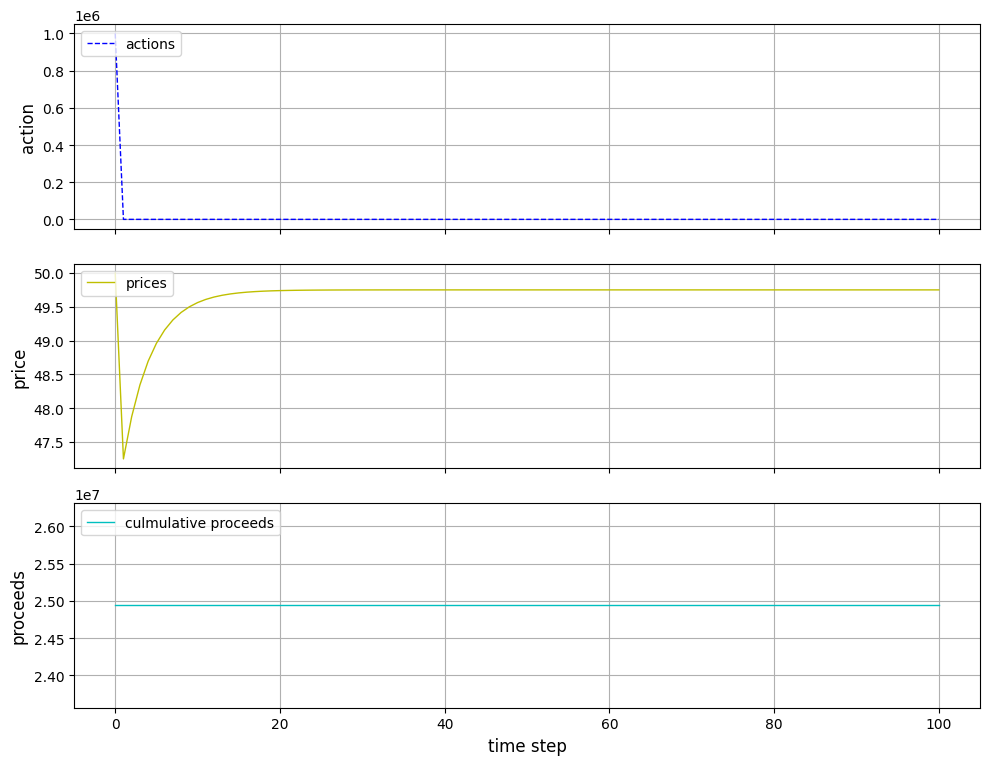

In [11]:
# Run the simulation and comparison
if __name__ == "__main__":

    # # Simulate optimal liquidation strategy
    # env1 = AlmgrenChrissEnv()
    # env1.simulate(optimal_liquidation_strategy)
    # env1.plot_hist()
    
   # Simulate random liquidation strategy
   env2 = simulateAC(N=100, sigma = 0, param_transient_impact = (2.5e-06, 2.5))
   results = env2.sim_history(frontload, render=True)
   env2.plot_hist()
    # 